# Clustering algorithms & visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

## Load & clean the dataset

In [2]:
df, meta = pyreadstat.read_sav('data/PHHR71FL.SAV')
df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV011,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV019,HV020,HV021,HV022,HV023,HV024,HV025,HV026,HV027,HV028,HV030,HV031,HV032,HV035,HV040,HV041,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV804,HV807D,HV807M,HV807Y,...,SH232A$1,SH232A$2,SH232A$3,SH232A$4,SH232A$5,SH232B$1,SH232B$2,SH232B$3,SH232B$4,SH232B$5,SH233A$1,SH233A$2,SH233A$3,SH233A$4,SH233A$5,SH233B$1,SH233B$2,SH233B$3,SH233B$4,SH233B$5,SH233C$1,SH233C$2,SH233C$3,SH233C$4,SH233C$5,SH233D$1,SH233D$2,SH233D$3,SH233D$4,SH233D$5,SH233E$1,SH233E$2,SH233E$3,SH233E$4,SH233E$5,SH233F$1,SH233F$2,SH233F$3,SH233F$4,SH233F$5,SH233X$1,SH233X$2,SH233X$3,SH233X$4,SH233X$5,SH233Z$1,SH233Z$2,SH233Z$3,SH233Z$4,SH233Z$5
0,00010001,PH7,1.0000,1.0000,1.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,961.0000",8.0000,2.0000,NaN,8.0000,8.0000,1.0000,1.0000,14.0000,1.0000,"8,300.0000",NaN,0.0000,1.0000,1.0000,1.0000,15.0000,2.0000,NaN,0.0000,0.0000,"8,300.0000",NaN,NaN,NaN,NaN,NaN,0.0000,1.0000,2.0000,2.0000,19.0000,0.0000,"1,448.0000","1,527.0000",39.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010002,PH7,1.0000,2.0000,4.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,964.0000",5.0000,2.0000,NaN,5.0000,5.0000,1.0000,1.0000,17.0000,1.0000,"8,303.0000",NaN,0.0000,1.0000,1.0000,1.0000,15.0000,2.0000,NaN,0.0000,0.0000,"8,300.0000",NaN,NaN,NaN,NaN,NaN,0.0000,1.0000,2.0000,2.0000,25.0000,0.0000,"1,017.0000","1,045.0000",28.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00010004,PH7,1.0000,4.0000,2.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,963.0000",4.0000,1.0000,NaN,4.0000,4.0000,0.0000,1.0000,16.0000,1.0000,"8,303.0000",NaN,0.0000,1.0000,1.0000,1.0000,15.0000,2.0000,NaN,0.0000,0.0000,"8,300.0000",NaN,NaN,NaN,NaN,NaN,0.0000,1.0000,2.0000,2.0000,14.0000,0.0000,"1,455.0000","1,513.0000",18.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00010007,PH7,1.0000,7.0000,2.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,962.0000",5.0000,1.0000,NaN,5.0000,5.0000,2.0000,1.0000,15.0000,1.0000,"8,302.0000",NaN,0.0000,1.0000,1.0000,1.0000,15.0000,2.0000,NaN,0.0000,0.0000,"8,300.0000",NaN,NaN,NaN,NaN,NaN,0.0000,1.0000,2.0000,2.0000,18.0000,0.0000,911.0000,937.0000,26.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00010008,PH7,1.0000,8.0000,1.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,961.0000",11.0000,0.0000,NaN,11.0000,9.0000,0.0000,1.0000,14.0000,1.0000,"8,303.0000",NaN,0.0000,1.0000,1.0000,1.0000,15.0000,2.0000,NaN,0.0000,0.0000,"8,300.0000",NaN,NaN,NaN,NaN,NaN,0.0000,1.0000,2.0000,2.0000,18.0000,1.0000,"1,432.0000","1,510.0000",38.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
meta.column_names_to_labels

{'HHID': 'Case Identification',
 'HV000': 'Country code and phase',
 'HV001': 'Cluster number',
 'HV002': 'Household number',
 'HV003': "Respondent's line number (answering Household questionnaire)",
 'HV004': 'Ultimate area unit',
 'HV005': 'Household sample weight (6 decimals)',
 'HV006': 'Month of interview',
 'HV007': 'Year of interview',
 'HV008': 'Date of interview (CMC)',
 'HV008A': 'Date of interview Century Day Code (CDC)',
 'HV009': 'Number of household members',
 'HV010': 'Number of eligible women in household',
 'HV011': 'NA - Number of eligible men in household',
 'HV012': 'Number of de jure members',
 'HV013': 'Number of de facto members',
 'HV014': 'Number of children 5 and under (de jure)',
 'HV015': 'Result of household interview',
 'HV016': 'Day of interview',
 'HV017': 'Number of visits',
 'HV018': 'Interviewer identification',
 'HV019': 'NA - Keyer identification',
 'HV020': 'Ever-married sample',
 'HV021': 'Primary sampling unit',
 'HV022': 'Sample strata for sampl

In [4]:
meta.variable_value_labels

{'HV003': {0.0: 'Incomplete household'},
 'HV015': {1.0: 'Completed',
  2.0: 'No Household member/no competent member at home',
  3.0: 'Entire Household absent for extended period of time',
  4.0: 'Postponed',
  5.0: 'Refused',
  6.0: 'Dwelling vacant or address not a dwelling',
  7.0: 'Dwelling destroyed',
  8.0: 'Dwelling not found',
  9.0: 'Other'},
 'HV020': {0.0: 'All woman sample', 1.0: 'Ever married sample'},
 'HV022': {1.0: 'BASILAN',
  2.0: 'CITY OF ISABELA',
  3.0: 'LANAO DEL SUR',
  4.0: 'MAGUINDANAO',
  5.0: 'COTABATO CITY',
  6.0: 'SULU',
  7.0: 'TAWI-TAWI',
  8.0: 'ABRA',
  9.0: 'APAYAO',
  10.0: 'BAGUIO CITY',
  11.0: 'BENGUET (Excluding Baguio City)',
  12.0: 'IFUGAO',
  13.0: 'KALINGA',
  14.0: 'MOUNTAIN PROVINCE',
  15.0: 'BUTUAN CITY (Capital)',
  16.0: 'AGUSAN DEL NORTE (Excluding Butuan City)',
  17.0: 'AGUSAN DEL SUR',
  18.0: 'DINAGAT ISLANDS',
  19.0: 'SURIGAO DEL NORTE',
  20.0: 'SURIGAO DEL SUR',
  21.0: 'CALOOCAN CITY',
  22.0: 'CITY OF MALABON',
  23.0: 'CIT

In [5]:
df.shape

(27496, 2472)

In [6]:
df.isna().sum()

HHID              0
HV000             0
HV001             0
HV002             0
HV003             0
HV004             0
HV005             0
HV006             0
HV007             0
HV008             0
HV008A            0
HV009             0
HV010             0
HV011         27496
HV012             0
HV013             0
HV014             0
HV015             0
HV016             0
HV017             0
HV018             0
HV019         27496
HV020             0
HV021             0
HV022             0
HV023             0
HV024             0
HV025             0
HV026         27496
HV027             0
HV028             0
HV030             0
HV031         27496
HV032         27496
HV035         27496
HV040         27496
HV041         27496
HV042             0
HV044             0
HV045A            0
HV045B            0
HV045C            0
HV046             0
HV801             0
HV802             0
HV803             0
HV804         27496
HV807D        27496
HV807M        27496
HV807Y        27496


In [7]:
df[df.index.duplicated(keep=False)]

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV011,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV019,HV020,HV021,HV022,HV023,HV024,HV025,HV026,HV027,HV028,HV030,HV031,HV032,HV035,HV040,HV041,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV804,HV807D,HV807M,HV807Y,...,SH232A$1,SH232A$2,SH232A$3,SH232A$4,SH232A$5,SH232B$1,SH232B$2,SH232B$3,SH232B$4,SH232B$5,SH233A$1,SH233A$2,SH233A$3,SH233A$4,SH233A$5,SH233B$1,SH233B$2,SH233B$3,SH233B$4,SH233B$5,SH233C$1,SH233C$2,SH233C$3,SH233C$4,SH233C$5,SH233D$1,SH233D$2,SH233D$3,SH233D$4,SH233D$5,SH233E$1,SH233E$2,SH233E$3,SH233E$4,SH233E$5,SH233F$1,SH233F$2,SH233F$3,SH233F$4,SH233F$5,SH233X$1,SH233X$2,SH233X$3,SH233X$4,SH233X$5,SH233Z$1,SH233Z$2,SH233Z$3,SH233Z$4,SH233Z$5


In [8]:
df.dropna(axis = 1, how = 'all', inplace = True)
df = df.loc[:,~df.columns.str.contains('\$')]

df = df.set_index('HHID')
df.shape

(27496, 337)

## Feature Selection & Engineering

In [9]:
feature_cols = ['HV009','HV014','HV025', 'HV201', 'HV202', 'SH202', 'SH207', 'SH221A']

for col in feature_cols:
    print(f'{col}: {meta.column_names_to_labels[col]}')

HV009: Number of household members
HV014: Number of children 5 and under (de jure)
HV025: Type of place of residence
HV201: Source of drinking water
HV202: Source of non-drinking water
SH202: Number of sick/injured persons
SH207: How many of your HH members visited a health facility for consultation/advise or treatment In the last 30 days
SH221A: Number of persons confined in a hospital/clinic


In [10]:
data = df[feature_cols].copy().fillna(0)

In [11]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X = scaler.fit_transform(data)

In [12]:
print(X.min())
print(X.max())

0.0
0.9997399557880879


## Applying clustering algorithms

### K-Means Clustering

Text(0.5, 1.0, 'Silhouetter Score Curve')

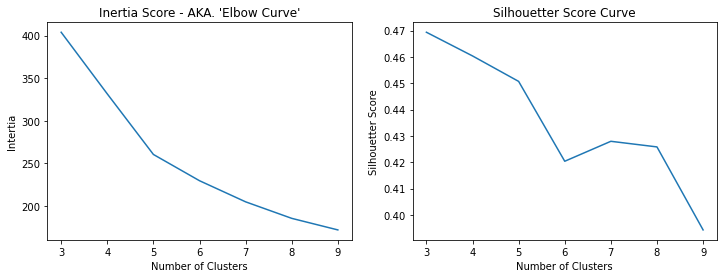

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil = []

for k in range(3,10):
    
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))
    

fig, ax = plt.subplots(1,2, figsize=(12,4))

# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title("Inertia Score - AKA. 'Elbow Curve'")

# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [14]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)   

df['cluster_labels'] = cluster_labels
df['cluster_labels'].value_counts()

2    9312
0    7238
1    6028
4    2534
3    2384
Name: cluster_labels, dtype: int64

Ideally, we should try out different clustering algorithms and see which best clusters our data. But since there are limitations in running the hierarchical model with our current dataset, we stick to the k-means algorithm for now and try to look into the following.

- Does it makes sense to use the raw numbers as features? What can be an alternative to the raw numbers?
- Are there outliers in the other features as well?
- Try exploring different number of clusters. How many clusters can you characterize?

-----------------------------
## Cluster Visualizations

Prior visualization, it might help to recode labels into the dataset so they make more sense.

In [15]:
df_labeled = df.copy()

In [16]:
survey_options = meta.variable_value_labels
n = len(df_labeled.columns)

for i, col in enumerate(df_labeled.columns):
    print(f'{i+1} out of {n}... Recoding {col}...')
    try:
        df_labeled[col] = df_labeled[col].replace(survey_options[col])
    except:
        pass

1 out of 338... Recoding HV000...
2 out of 338... Recoding HV001...
3 out of 338... Recoding HV002...
4 out of 338... Recoding HV003...
5 out of 338... Recoding HV004...
6 out of 338... Recoding HV005...
7 out of 338... Recoding HV006...
8 out of 338... Recoding HV007...
9 out of 338... Recoding HV008...
10 out of 338... Recoding HV008A...
11 out of 338... Recoding HV009...
12 out of 338... Recoding HV010...
13 out of 338... Recoding HV012...
14 out of 338... Recoding HV013...
15 out of 338... Recoding HV014...
16 out of 338... Recoding HV015...
17 out of 338... Recoding HV016...
18 out of 338... Recoding HV017...
19 out of 338... Recoding HV018...
20 out of 338... Recoding HV020...
21 out of 338... Recoding HV021...
22 out of 338... Recoding HV022...
23 out of 338... Recoding HV023...
24 out of 338... Recoding HV024...
25 out of 338... Recoding HV025...
26 out of 338... Recoding HV027...
27 out of 338... Recoding HV028...
28 out of 338... Recoding HV030...
29 out of 338... Recoding HV

242 out of 338... Recoding SH410...
243 out of 338... Recoding SH411A...
244 out of 338... Recoding SH411B...
245 out of 338... Recoding SH411C...
246 out of 338... Recoding SH411D...
247 out of 338... Recoding SH411E...
248 out of 338... Recoding SH411F...
249 out of 338... Recoding SH411G...
250 out of 338... Recoding SH411X...
251 out of 338... Recoding SH411Z...
252 out of 338... Recoding SH501...
253 out of 338... Recoding SH502A...
254 out of 338... Recoding SH502B...
255 out of 338... Recoding SH502C...
256 out of 338... Recoding SH502D...
257 out of 338... Recoding SH502E...
258 out of 338... Recoding SH502F...
259 out of 338... Recoding SH502X...
260 out of 338... Recoding SH502Z...
261 out of 338... Recoding SH503...
262 out of 338... Recoding SH504A...
263 out of 338... Recoding SH504B...
264 out of 338... Recoding SH504C...
265 out of 338... Recoding SH504D...
266 out of 338... Recoding SH504E...
267 out of 338... Recoding SH504F...
268 out of 338... Recoding SH504G...
269 

In [17]:
df_labeled.head()

,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV020,HV021,HV022,HV023,HV024,HV025,HV027,HV028,HV030,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV201,HV202,HV201A,HV204,HV205,HV206,HV207,HV208,HV209,HV210,HV211,HV212,HV213,...,SH509,SH510A,SH510B,SH510C,SH510D,SH510E,SH510F,SH510G,SH510H,SH510I,SH510J,SH510K,SH510L,SH510M,SH510N,SH510O,SH510X,SH510Z,SH511A,SH511B,SH511C,SH511D,SH511E,SH511F,SH511G,SH511H,SH511I,SH511J,SH511K,SH511L,SH511M,SH512H,SH512I,SH512J,SH511X,SH511Z,SH512A,SH512B,SH512C,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV,cluster_labels
HHID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010001,PH7,1.0000,1.0000,1.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,961.0000",8.0000,2.0000,8.0000,8.0000,1.0000,Completed,14.0000,1.0000,"8,300.0000",All woman sample,1.0000,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0000,"8,300.0000",Not selected,Household selected,Tagalog,Tagalog,Yakan,No,"1,448.0000","1,527.0000",39.0000,Piped into dwelling,NaN,"No, not interrupted for a full day",On premises,Flush to septic tank,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Ceramic tiles,...,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,2.0000,4
00010002,PH7,1.0000,2.0000,4.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,964.0000",5.0000,2.0000,5.0000,5.0000,1.0000,Completed,17.0000,1.0000,"8,303.0000",All woman sample,1.0000,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0000,"8,300.0000",Not selected,Household selected,Tagalog,Tagalog,Ivatan,No,"1,017.0000","1,045.0000",28.0000,Bottled water,Piped into dwelling,"No, not interrupted for a full day",On premises,Flush to septic tank,Yes,No,Yes,Yes,Yes,Yes,Yes,Ceramic tiles,...,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No,2.0000,0
00010004,PH7,1.0000,4.0000,2.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,963.0000",4.0000,1.0000,4.0000,4.0000,0.0000,Completed,16.0000,1.0000,"8,303.0000",All woman sample,1.0000,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0000,"8,300.0000",Not selected,Household selected,Tagalog,Tagalog,Maranao,No,"1,455.0000","1,513.0000",18.0000,Bottled water,Piped into dwelling,"No, not interrupted for a full day",On premises,Flush to septic tank,Yes,No,Yes,No,No,No,No,Cement,...,Yes,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,2.0000,0
00010007,PH7,1.0000,7.0000,2.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,962.0000",5.0000,1.0000,5.0000,5.0000,2.0000,Completed,15.0000,1.0000,"8,302.0000",All woman sample,1.0000,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0000,"8,300.0000",Not selected,Household selected,Tagalog,Tagalog,Tausog,No,911.0000,937.0000,26.0000,Piped to neighbor,NaN,Don't know,On premises,Flush to septic tank,Yes,No,No,No,No,No,No,Wood planks,...,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,2.0000,1
00010008,PH7,1.0000,8.0000,1.0000,1.0000,"364,301.0000",8.0000,"2,017.0000","1,412.0000","42,961.0000",11.0000,0.0000,11.0000,9.0000,0.0000,Completed,14.0000,1.0000,"8,303.0000",All woman sample,1.0000,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0000,"8,300.0000",Not selected,Household selected,Tagalog,Tagalog,Tausog,Yes,"1,432.0000","1,510.0000",38.0000,Piped into dwelling,NaN,"No, not interrupted for a full day",On premises,Composting toilet,Yes,No,Yes,No,Yes,No,No,Wo

#### Boxplots
To easily inspect & compare features used to cluster the dataset


_Inspect the following columns_ <br>
- `HV009`: Number of household members<br>
- `SH202`: Number of sick/injured persons<br>
- `SH207`: How many of your HH members visited a health facility for consultation/advise or treatment In the last 30 days<br>
- `SH221A`: Number of persons confined in a hospital/clinic

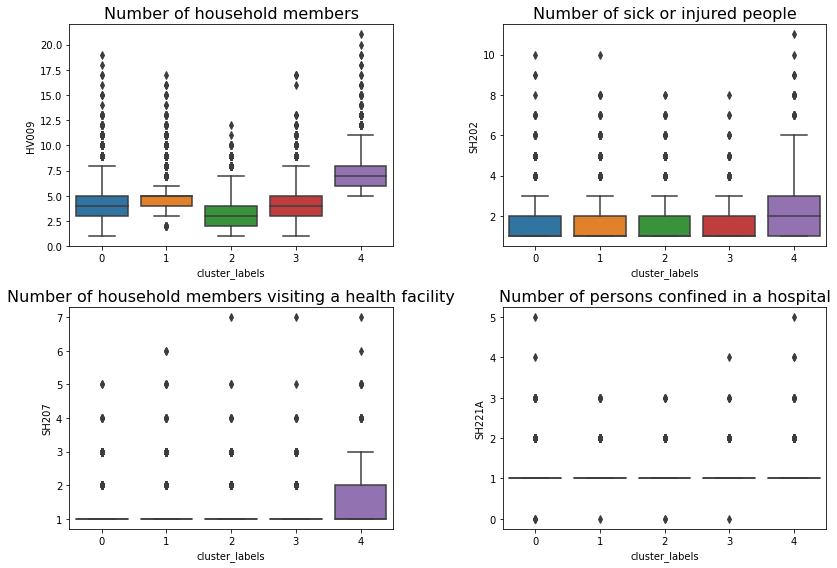

In [18]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.boxplot(x="cluster_labels", y='HV009', data=df_labeled, ax=axes[0,0])
axes[0,0].set_title('Number of household members', fontsize=16)

sns.boxplot(x="cluster_labels", y='SH202', data=df_labeled, ax=axes[0,1])
axes[0,1].set_title('Number of sick or injured people', fontsize=16)

sns.boxplot(x="cluster_labels", y='SH207', data=df_labeled, ax=axes[1,0])
axes[1,0].set_title('Number of household members visiting a health facility', fontsize=16)

sns.boxplot(x="cluster_labels", y='SH221A', data=df_labeled, ax=axes[1,1])
axes[1,1].set_title('Number of persons confined in a hospital', fontsize=16)

plt.tight_layout()
plt.show();

#### 3D Plots
- Useful for when we have multiple variables used to cluster our data
- Can also encode a third variable
- However, it can also get confusing, sometimes even misleading — how we look at the chart may give us the wrong impression

<ipython-input-19-4d104b782159>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_labeled['c'] = df_labeled['cluster_labels'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})


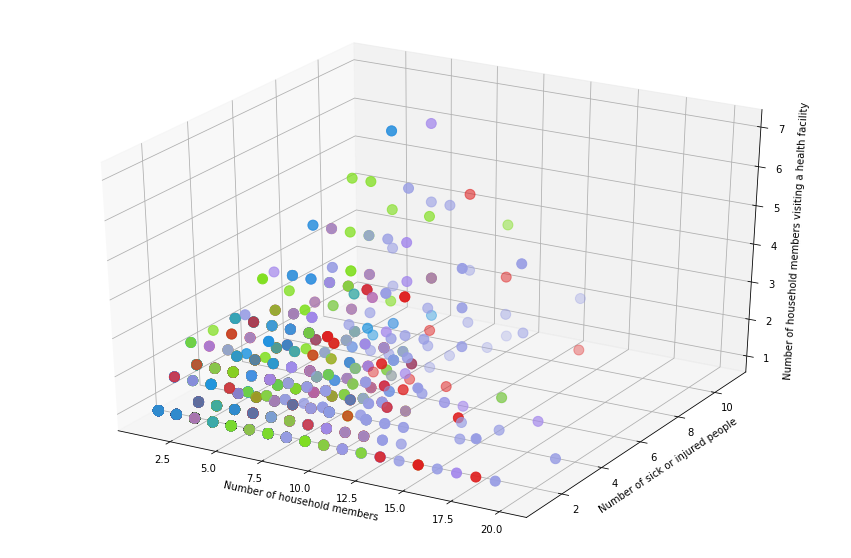

In [19]:
from mpl_toolkits.mplot3d import Axes3D

total_mems = df_labeled.HV009
sick = df_labeled.SH202
visit_faci = df_labeled.SH207

colors = ['#DF2020', '#81DF20', '#2095DF', '#A285EC', '#989DE4']
df_labeled['c'] = df_labeled['cluster_labels'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(total_mems, sick, visit_faci, c = df_labeled['c'], s=100)
ax.set_xlabel('Number of household members')
ax.set_ylabel('Number of sick or injured people')
ax.set_zlabel('Number of household members visiting a health facility')
plt.show()

#### T-SNE
- t-SNE = “t-distributed stochastic neighbor embedding”
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

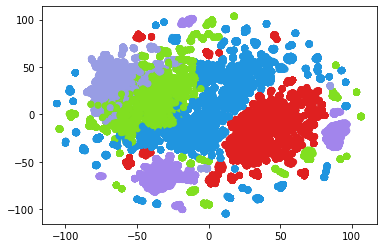

In [20]:
# t-SNE visualization of grain dataset
# Import TSNE
from sklearn.manifold import TSNE

variety_numbers = list(df_labeled.iloc[:,-1])

# Create a TSNE instance: model
model = TSNE(learning_rate=300, perplexity=30)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

#### Radar Chart

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Remove c - color column from df since it's not needed for this visuals
#Drop Cluster labels for now since we don't want to scale its values 
df_labeled.drop(columns = ['c', 'cluster_labels'], inplace = True)

df_minmax = scaler.fit_transform(df[feature_cols])
df_minmax = pd.DataFrame(df_minmax, index=df_labeled.index, columns=feature_cols)

df_minmax['cluster_labels'] = cluster_labels

df_clusters = df_minmax.set_index("cluster_labels")
df_clusters = df_clusters.groupby("cluster_labels").mean().reset_index().fillna(0)
df_clusters

,cluster_labels,HV009,HV014,HV025,HV201,HV202,SH202,SH207,SH221A
0,0,0.1596,0.0736,0.3877,0.7059,0.0044,0.0599,0.0343,0.2207
1,1,0.1944,0.1006,0.7384,0.0526,0.0000,0.0606,0.0392,0.2203
2,2,0.1203,0.0617,0.8402,0.2181,0.0000,0.0399,0.0275,0.2120
3,3,0.1633,0.0849,0.7039,0.7059,0.2704,0.0562,0.0395,0.2186
4,4,0.3168,0.1837,0.6772,0.0128,0.0000,0.1076,0.0695,0.2327


In [22]:
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('cluster_labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

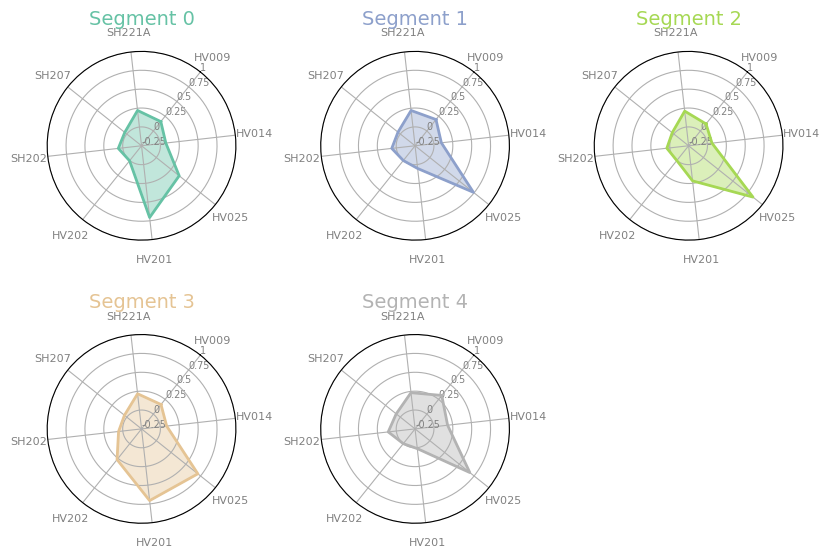

In [23]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['cluster_labels'][row]).astype(str), 
                color=my_palette(row))
    
plt.savefig('clusters.png')

## What if your features are categorical?
How do we do visualizations if our features are categorical. Let's use our k-modes output earlier to make a visualization.

In [24]:
df2 = df.copy().drop(columns = 'cluster_labels')

In [25]:
feature_qs = ['SH308', 'SH401', 'SH403','SH409', 'SH411', 'SH502','SH504','SH510', 'SH511', 'SH512']
Z = df2.loc[:, df2.columns.str.contains('|'.join(feature_qs), case=False)]

for col in Z.columns:
    print(f'{col}: {meta.column_names_to_labels[col]}')

SH308A: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: Needs supplements/vitamins
SH308B: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: Affordable
SH308C: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: Prescribed by doctor
SH308D: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: Prefers alternative products
SH308E: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: Prefers traditional herbal/natural/alternative medicines
SH308F: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: Recommended by friends,relatives
SH308G: Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as: For trial


In [26]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=7, init='random', n_init=5, verbose=1)
cluster_labels = km.fit_predict(Z)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15590, cost: 358058.0
Run 1, iteration: 2/100, moves: 3647, cost: 357703.0
Run 1, iteration: 3/100, moves: 279, cost: 357627.0
Run 1, iteration: 4/100, moves: 229, cost: 357539.0
Run 1, iteration: 5/100, moves: 11, cost: 357539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14766, cost: 360482.0
Run 2, iteration: 2/100, moves: 77, cost: 360482.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13106, cost: 359621.0
Run 3, iteration: 2/100, moves: 1906, cost: 359438.0
Run 3, iteration: 3/100, moves: 112, cost: 359438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12846, cost: 359756.0
Run 4, iteration: 2/100, moves: 1388, cost: 359710.0
Run 4, iteration: 3/100, moves: 5, cost: 359710

In [27]:
df2['cluster_labels'] = cluster_labels
df2['cluster_labels'].value_counts()

2    7287
5    5682
6    5447
3    3132
1    2852
0    2636
4     460
Name: cluster_labels, dtype: int64

After running k-modes on the dataset, we can create a crosstabulation of responses to further nuance the different clusters. Crosstab output below shows the percentage breakdown of responses by cluster.

The crosstab was generated using the `pd.crosstab` method. Here is the documentation for your review: [link](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

In [28]:
df2_viz = df2.loc[:, Z.columns.tolist() + ['cluster_labels']]
feature_cols = list(Z.columns)     

df2_crosstab = pd.DataFrame()
for col in feature_cols:
    # so we don't lose column indices, replace 1 in the binary cols with the column indices
    df2_viz[col] = df2_viz[col].replace({1: col})
    
    # tabulate the values for the col
    df2_loop_crosstab = pd.crosstab(index = df2_viz[col],
                                   columns = df2_viz['cluster_labels'], )
    
    # compute for the percentage, round to the 1st decimal point
    df2_loop_crosstab = (100. * df2_loop_crosstab / df2_loop_crosstab.sum()).round(1)

    # append output to the new dataframe
    df2_crosstab = pd.concat([df2_crosstab, df2_loop_crosstab])


# remove no's or zeroes
df2_crosstab = df2_crosstab.reset_index(drop=False)
df2_crosstab = df2_crosstab[df2_crosstab['index']!=0]

# add & adjust labels accordingly
df2_crosstab['label'] = df2_crosstab['index'].apply(lambda x: meta.column_names_to_labels[x]) 
df2_crosstab['question'] = df2_crosstab['label'].apply(lambda x: x.replace(':', '-').replace('.' ,'-').split('-')[0].strip())
df2_crosstab['question_label'] = df2_crosstab['question'].replace({'Why did you buy supplements and vitamin products advertised in television, radio or print with reminder as':'Bought supplements sold as',
       'Knowledge and opinions regarding some diseases and health practices':'Health knowledge',
       'What kind of symptoms would make you suspect that a person may have cancer': 'Cancer perception',
       'Who is likely to have heart disease': 'Heart disease perception',
       'Who is likely to have diabetes': 'Diabetes perception',
       'Who is likely to have  diabetes': 'Diabetes perception',
       'How does dengue spread from one person to another': 'Dengue perception',
       'How can dengue fever be prevented': 'Dengue prevention',
       'Signs and symptoms you would think someone might have TB': 'TB perception',
       'What do you think is the cause of TB': 'TB causes',
       'How does TB spread from one person to another': 'TB spread'}
        )

df2_crosstab['answer'] = df2_crosstab['label'].apply(lambda x: x.replace(':', '-').replace('.' ,'-').split('-')[1].strip())

df2_crosstab

cluster_labels,index,0,1,2,3,4,5,6,label,question,question_label,answer
1,SH308A,20.8000,19.6000,15.1000,18.0000,16.7000,13.8000,12.3000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Needs supplements/vitamins
3,SH308B,0.5000,0.9000,0.8000,0.7000,1.7000,0.9000,0.6000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Affordable
5,SH308C,3.0000,3.2000,1.3000,2.1000,6.3000,1.4000,1.4000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Prescribed by doctor
7,SH308D,1.8000,1.5000,1.2000,1.4000,4.1000,1.1000,0.8000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Prefers alternative products
9,SH308E,3.9000,3.3000,2.5000,2.9000,3.7000,2.2000,2.1000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Prefers traditional herbal/natural/alternative...
11,SH308F,4.2000,3.9000,2.2000,3.2000,3.7000,1.8000,1.9000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,"Recommended by friends,relatives"
13,SH308G,0.3000,0.2000,0.2000,0.4000,0.2000,0.3000,0.2000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,For trial
15,SH308H,0.9000,0.8000,0.7000,1.0000,0.2000,0.7000,0.6000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Based on advertisement
17,SH308X,0.0000,0.1000,0.1000,0.0000,0.0000,0.1000,0.0000,Why did you buy supplements and vitamin produc...,Why did you buy supplements and vitamin produc...,Bought supplements sold as,Other
19,SH401A,11.9000,23.5000,12.7000,11.9000,68.9000,8.9000,9.2000,Knowledge and opinions regarding some diseases...,Knowledge and opinions regarding some diseases...,Health knowledge,Avoid too much fat/fatty food


Now, we're ready to chart! We'll be making a __radial bar charts__ for our features. Let's use the code below for our chart template.

In [29]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment
            
def add_labels(angles, values, labels, offset, ax):
    # This is the space between the end of the bar and the label
    padding = 4

    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
    
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)
    
        # And finally add the text
        ax.text(x=angle, y=value + padding, s=label, ha=alignment, 
            va="center", rotation=rotation, rotation_mode="anchor") 

def make_radial_bar(df, cluster_num, label_col, group_col, CHART):
    df_sorted = (df.groupby([group_col, label_col])
                .apply(lambda x: x.sort_values(0, ascending = False))
                .reset_index(drop=True)
            )

    VALUES = df_sorted[cluster_num].values 
    LABELS = df_sorted[label_col].values
    GROUP = df_sorted[group_col].values

    PAD = 3
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    OFFSET = np.pi / 2

    offset = 0
    IDXS = []
    GROUPS_SIZE = df[group_col].value_counts().to_list()
    
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD


    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
    ax.set_title(f'{CHART}', fontweight = 'bold', fontsize = 16, y = 1.1)
    ax.set_theta_offset(OFFSET)
    ax.set_ylim(-100, 100)
    ax.set_frame_on(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

    ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
                    edgecolor="white", linewidth=2
                )

    add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

    offset = 0 

    for group, size in zip(df[group_col].unique(), GROUPS_SIZE):
        # Add line below bars
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
        ax.plot(x1, [-5] * 50, color="#333333")

        # Add text to indicate group
        ax.text(np.mean(x1), -25, group, color="#333333", fontsize=8, 
                        fontweight="normal", ha="center", va="center"
                    )

        # Add reference lines at 20, 40, 60, and 80
        x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
        ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
        ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
        ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
        ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
        ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)


        offset += size + PAD
    plt.show()

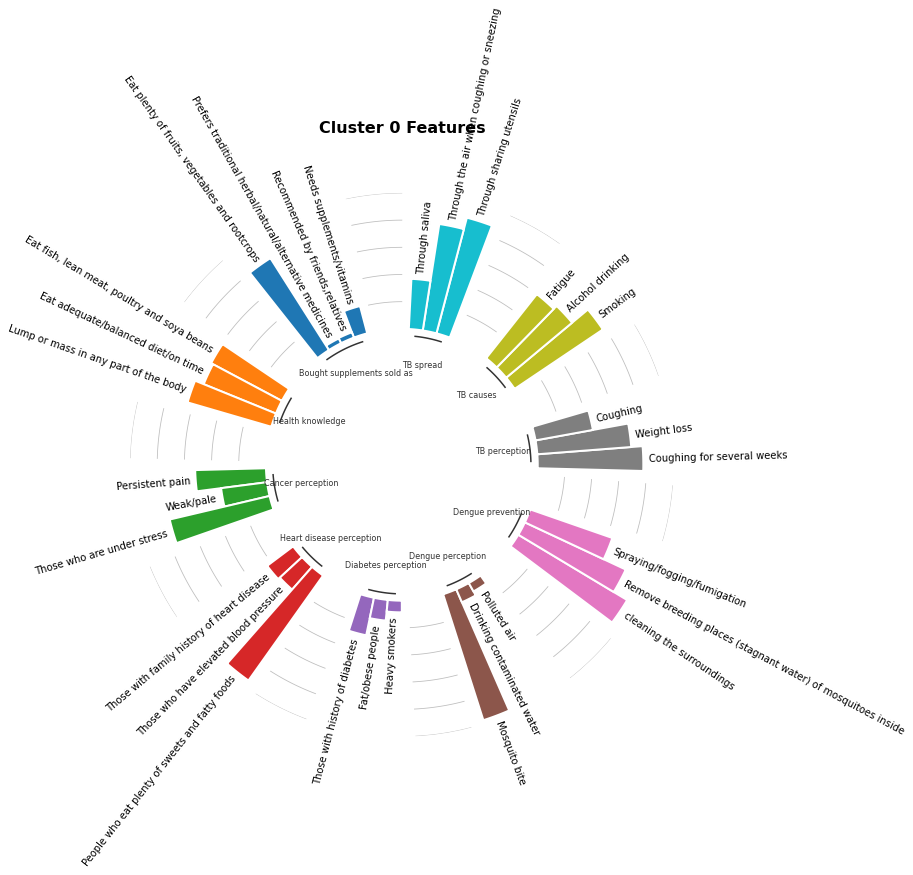

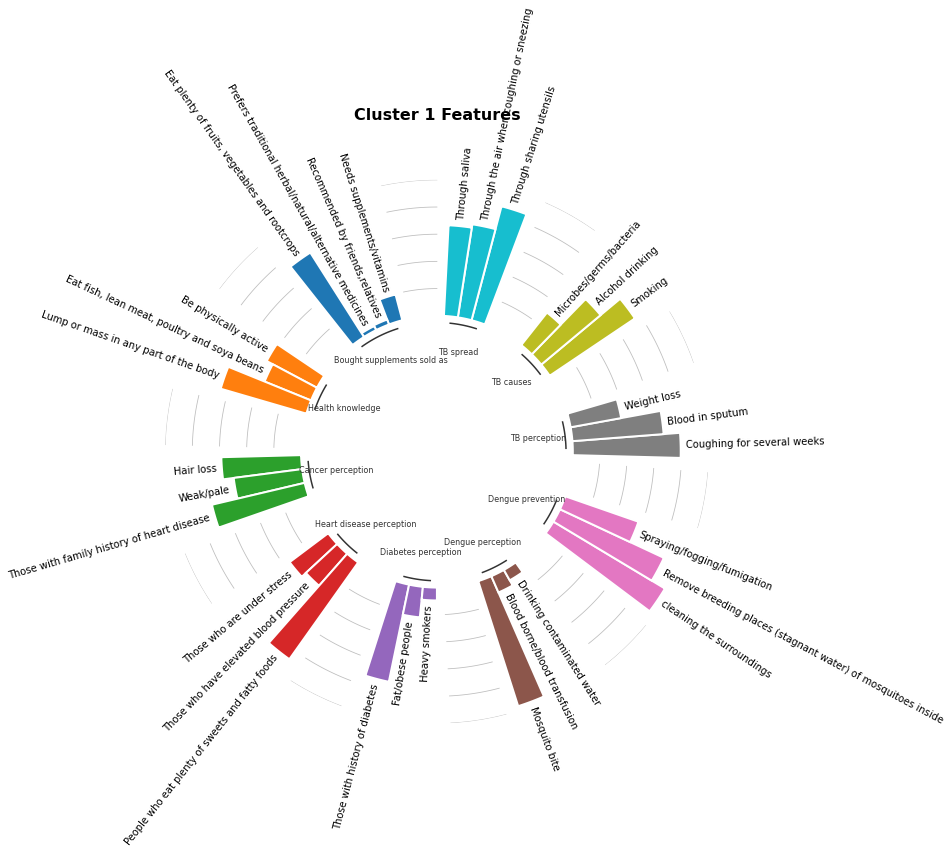

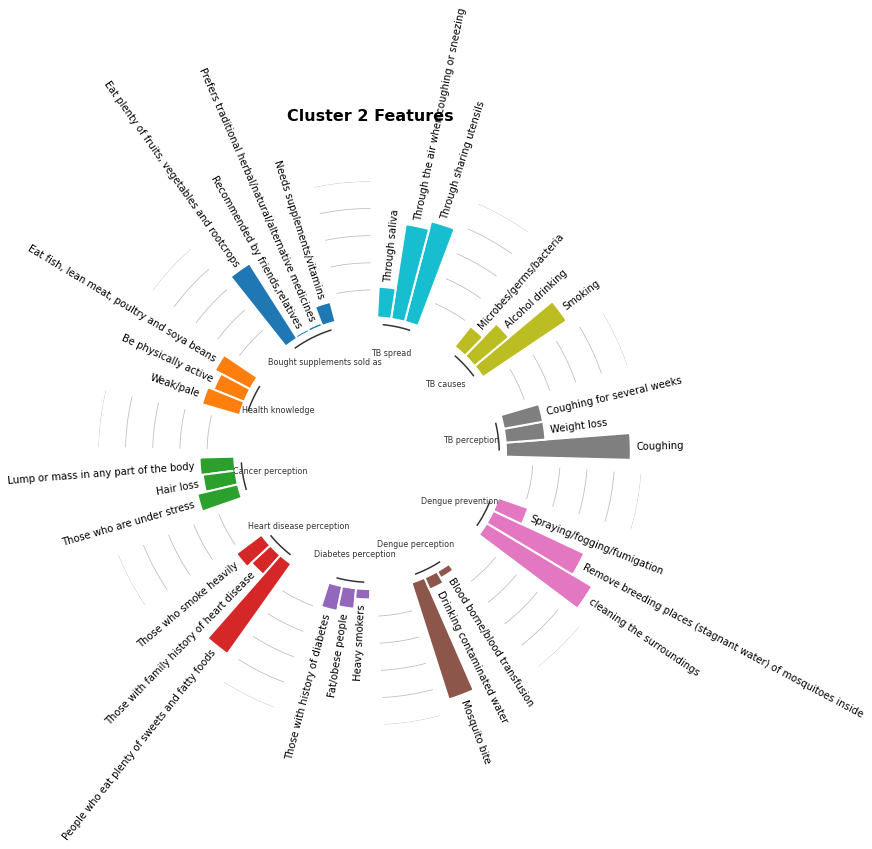

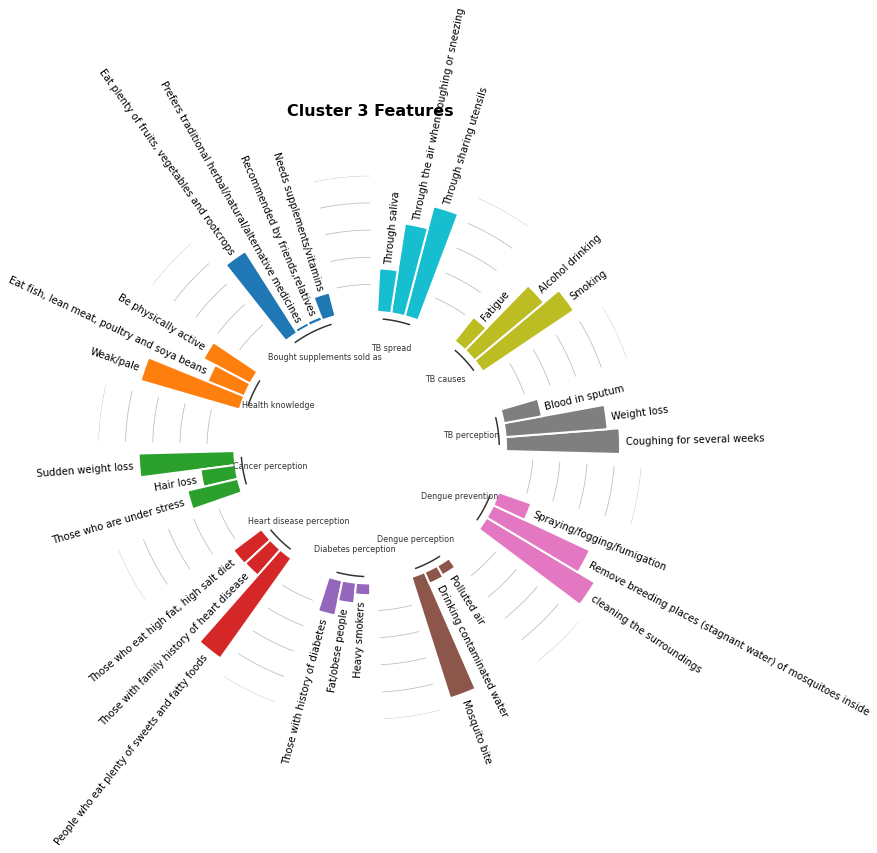

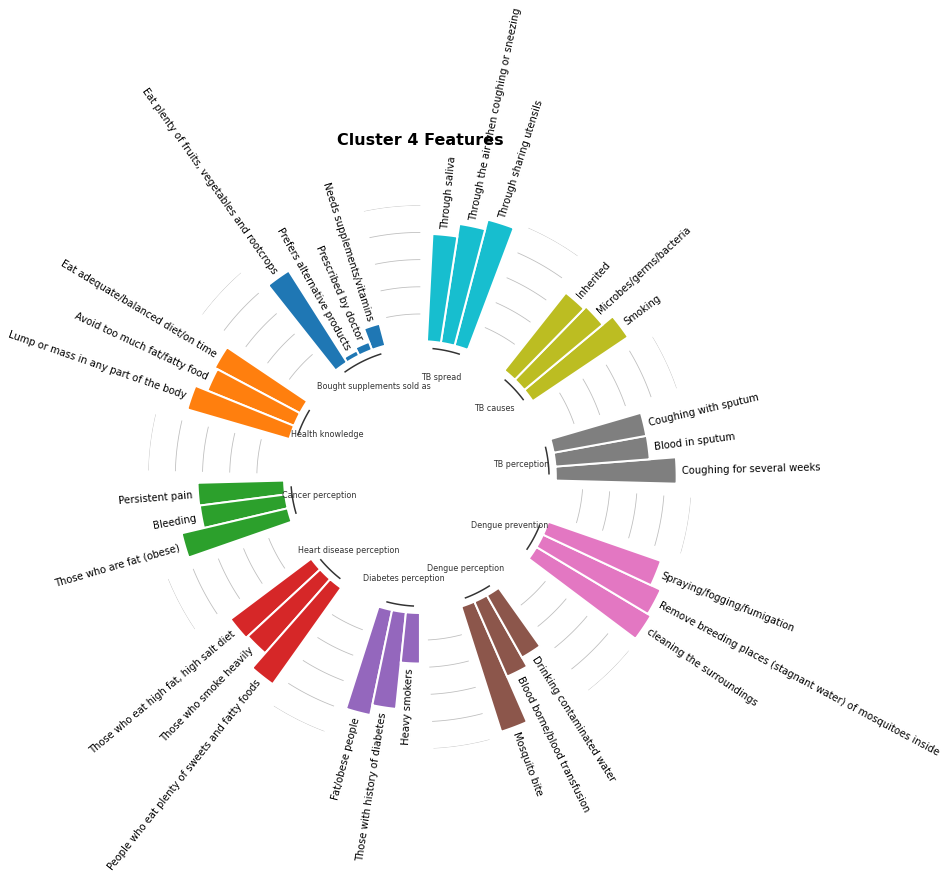

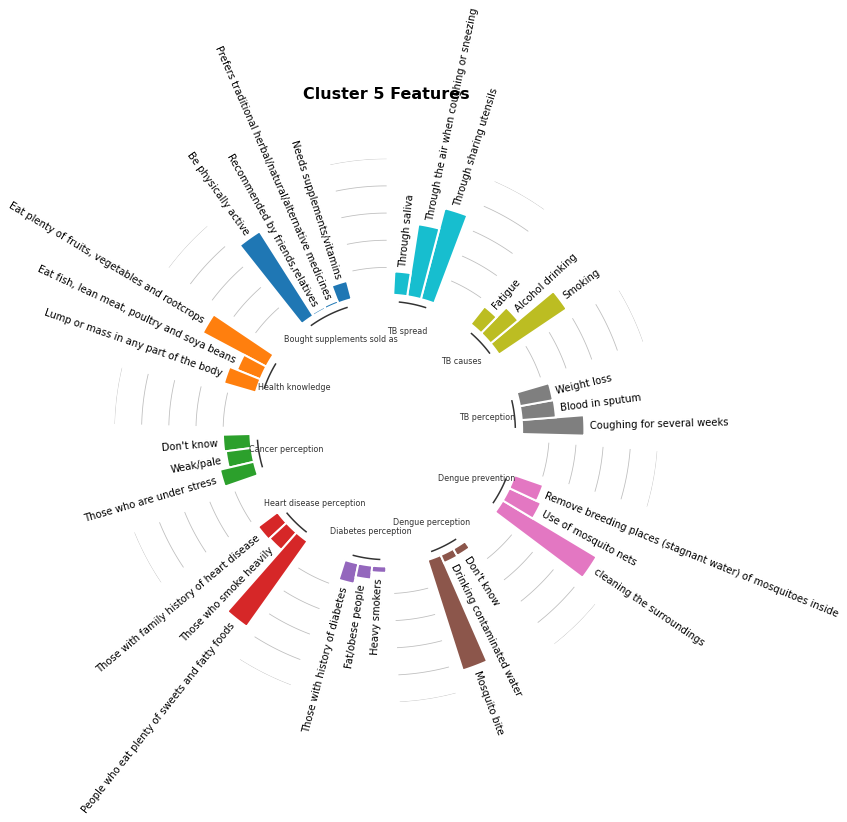

In [30]:
for cluster in range(0,6):
    # filtering to top three responses per q only
    viz = pd.DataFrame()
    for q in df2_crosstab['question'].unique():
        temp = df2_crosstab[df2_crosstab['question']==q].sort_values(cluster, ascending = False).head(3)
        viz = pd.concat([viz,temp])
        
    make_radial_bar(df = viz, cluster_num = cluster, label_col = 'answer', group_col = 'question_label', CHART = f'Cluster {cluster} Features')